In [1]:
import pandas as pd 
import numpy as np
import numpy.linalg as lalg
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.regularizers as rg
from sklearn.model_selection import KFold
from Models import *

In [2]:
auto = pd.read_csv("../data/auto-mpg.csv")
auto.fillna(auto.mean())
x = auto[auto.columns[1:7]].to_numpy()
ox = np.insert(x, 0, 1.0, axis = 1)
y = auto[auto.columns[0]].to_numpy()

In [4]:
auto_perceptron = Perceptron(ox, y, 0.1, build_fn = Perceptron.build_model)
forward_pcp = auto_perceptron.forward_selection(5000)
backward_pcp = auto_perceptron.backward_elimination(5000)
step_pcp = auto_perceptron.stepwise_regression(5000)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
[0, 6]
-8.34217836640098
[0, 6, 5]
-8.36582945087288
[0, 6, 5, 4]
-8.389600591611137
[0, 6, 5, 4, 2]
-8.413492705075795
[0, 6, 5, 4, 2, 1]
-8.43750671707854
[0, 6, 5, 4, 2, 1, 3]
-8.46164356290227
[0, 1, 2, 4, 5, 6]
-8.43750671707854
[0, 1, 2, 4, 5]
-8.413492705075795
[0, 1, 2, 4]
-8.389600591611137
[0, 2, 4]
-8.36582945087288
[0, 2]
-8.34217836640098
[0]
[0, 6]
[0]


In [5]:
auto_3L = NeuralNet3L(ox, y, build_fn = NeuralNet3L.build_model)
forward_3L = auto_3L.forward_selection()
backward_3L = auto_3L.backward_elimination()
step_3L = auto_3L.stepwise_regression()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 7)                 49        
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 8         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
[0, 5]
0.17434554404080516
[0, 5, 2]
0.6852855887594103
[0, 5, 2, 6]
0.8059008188054041
[0, 5, 2, 6, 4]
0.8510374652823722
[0, 5, 2, 6, 4, 1]
0.8544973762591883
[0, 5, 2, 6, 4, 1, 3]
0.7908145759416663
[0, 1, 2, 3, 4, 5]
0.624279334685024
[0, 1, 2, 3, 4]
0.5046516559051193
[0, 1, 3, 4]
0.7344029614616772
[0, 1, 4]
0.6489493672606311
[0, 4]
0.7043716758489609
[0]
[0, 5]
[0, 5, 2]
[0, 5, 2, 6]
[0, 5, 2, 6, 4]
[0, 5, 2, 6, 4, 1]


In [6]:
auto_4L = NeuralNet4L(ox, y, build_fn = NeuralNet4L.build_model)
forward_4L = auto_4L.forward_selection()
backward_4L = auto_4L.backward_elimination()
step_4L = auto_4L.stepwise_regression()

Model: "sequential_159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_238 (Dense)            (None, 7)                 49        
_________________________________________________________________
dense_239 (Dense)            (None, 3)                 24        
_________________________________________________________________
dense_240 (Dense)            (None, 1)                 4         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
[0, 3]
0.69278661402488
[0, 3, 4]
0.6804354435280908
[0, 3, 4, 2]
0.7180777133116263
[0, 3, 4, 2, 5]
0.7788811220998375
[0, 3, 4, 2, 5, 6]
0.8661134407988617
[0, 3, 4, 2, 5, 6, 1]
-0.015589161297244525
[0, 1, 3, 4, 5, 6]
0.8630477938496945
[0, 1, 4, 5, 6]
0.7993404277560061
[0, 4, 5, 6]
0.8399974784345796
[0, 4, 5]
0.6205052202260947
[0, 4]
-0.002528001262684043
[0]
[0, 5]
[0, 5, 4]


In [7]:
ridge_perceptron = keras.Sequential()
ridge_perceptron.add(layers.Dense(1, input_dim = 7, 
                                 kernel_initializer = "uniform", 
                                 activation = "relu", 
                                 use_bias = False,
                                 kernel_regularizer = rg.l2(0.01)))

optimizer = keras.optimizers.Adam(learning_rate = 0.0005)
ridge_perceptron.compile(loss = "mean_squared_error", optimizer = optimizer)

In [8]:
ridge_perceptron.fit(ox, y, epochs = 50, batch_size = 10, verbose = 0)
rsq = metrics.rsq(ridge_perceptron, ox, y)
rsq_cv = metrics.rsq_cv(ridge_perceptron, ox, y, epochs = 50)
print(f"Rsq = {rsq} Rsq_cv = {rsq_cv}")

Rsq = 0.5558958947658539 Rsq_cv = 0.7655218794941903


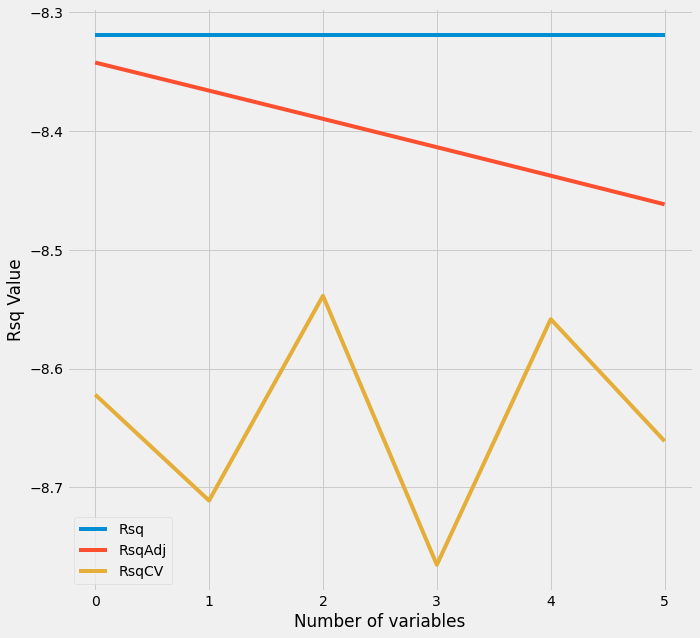

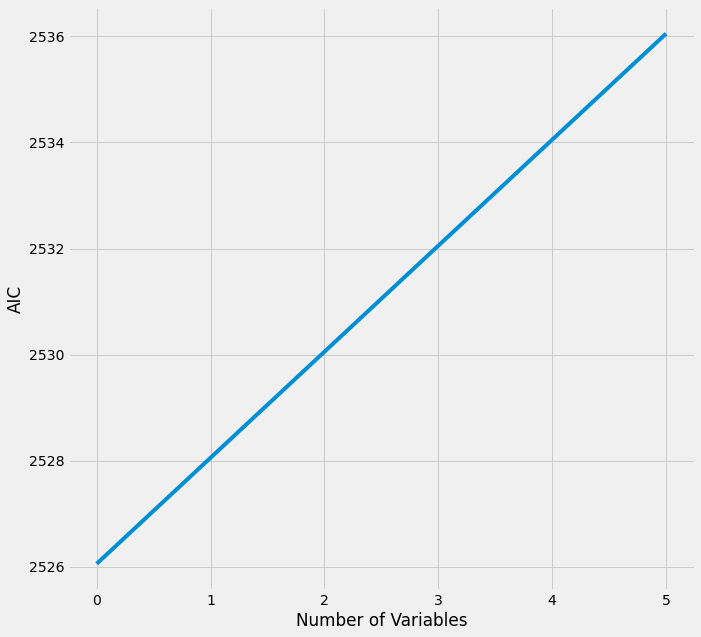

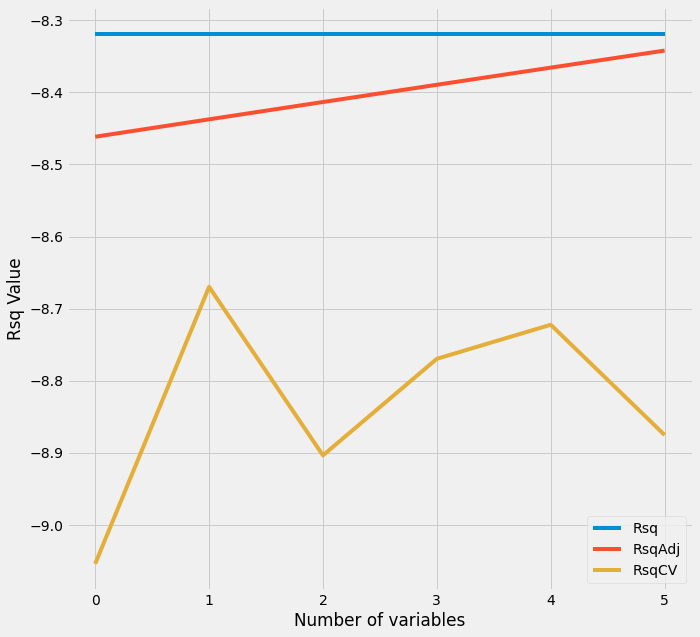

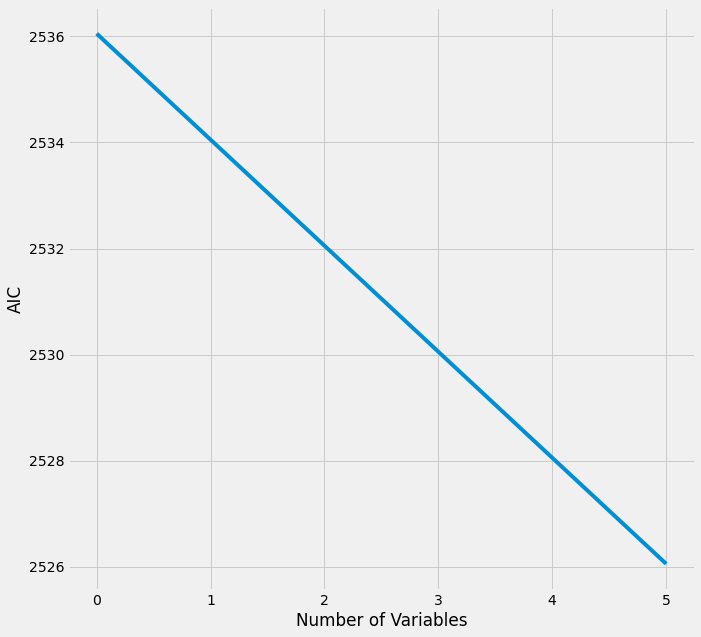

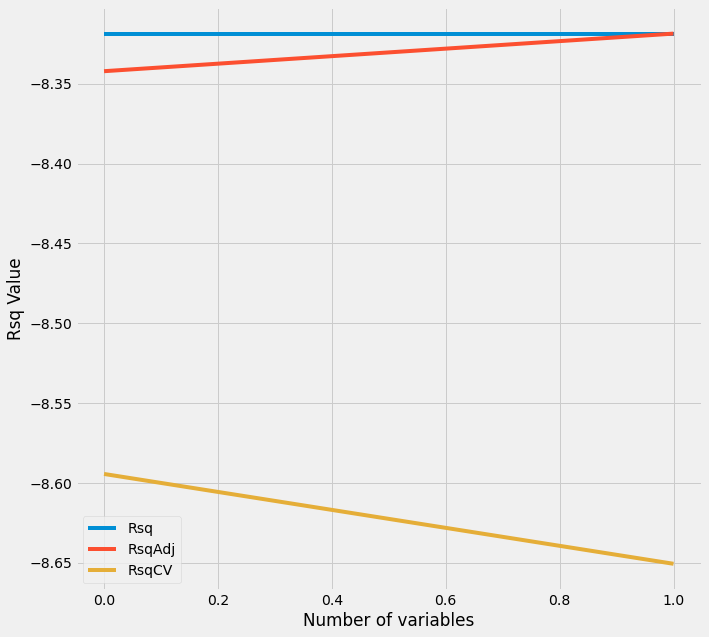

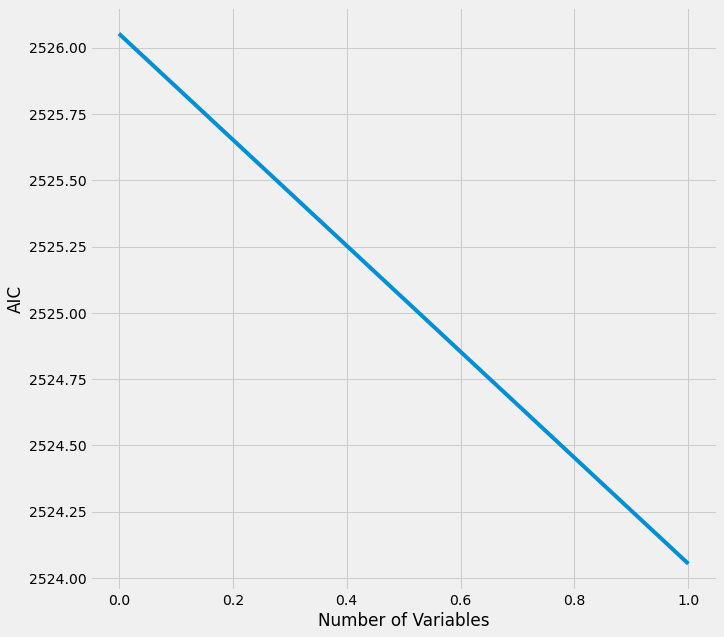

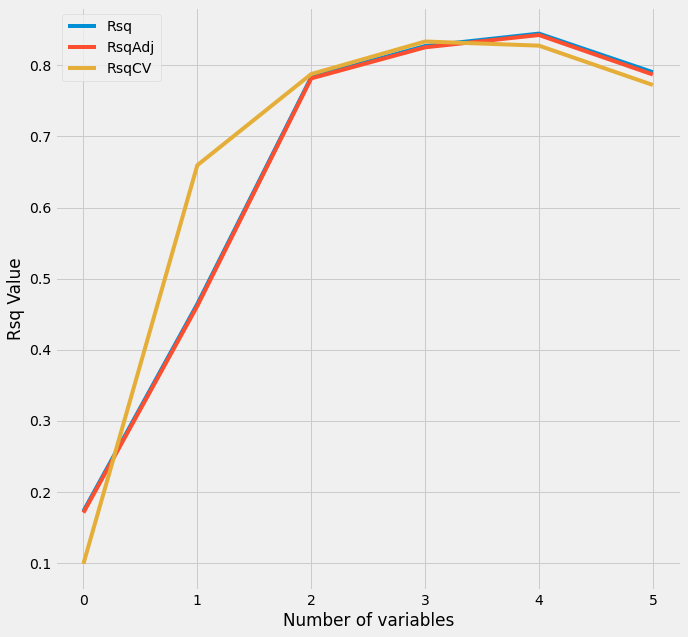

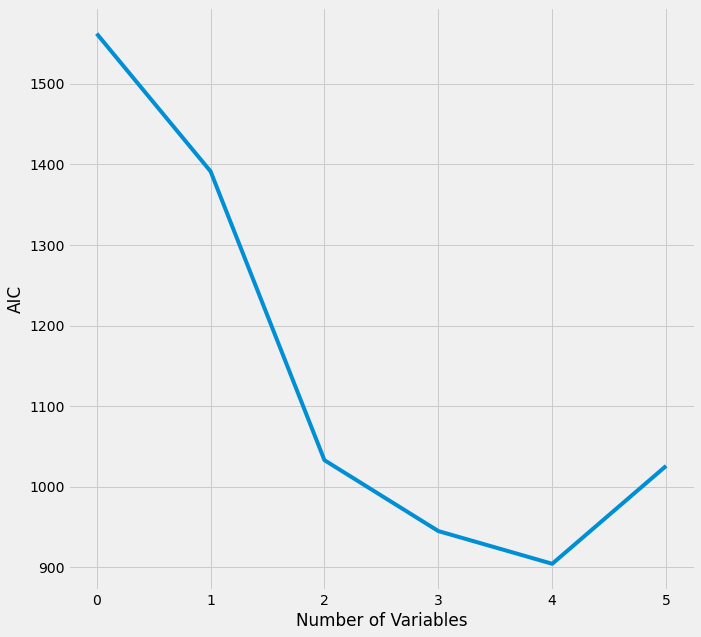

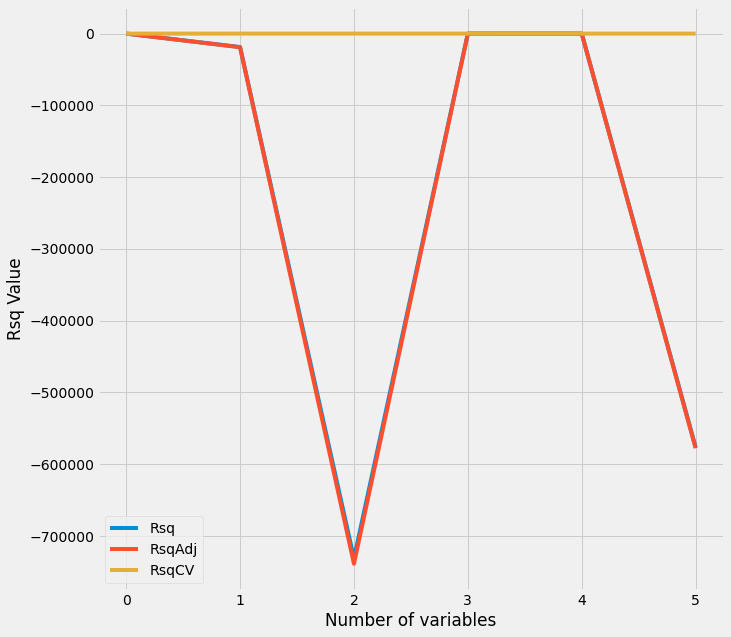

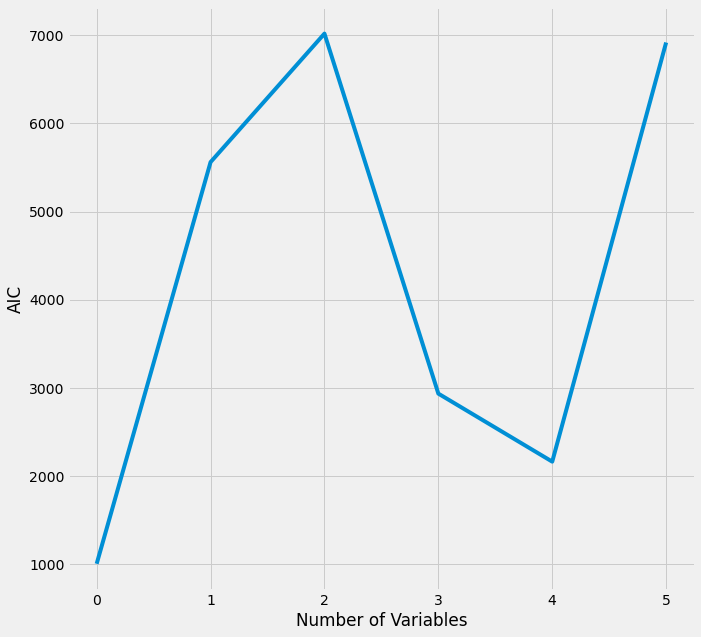

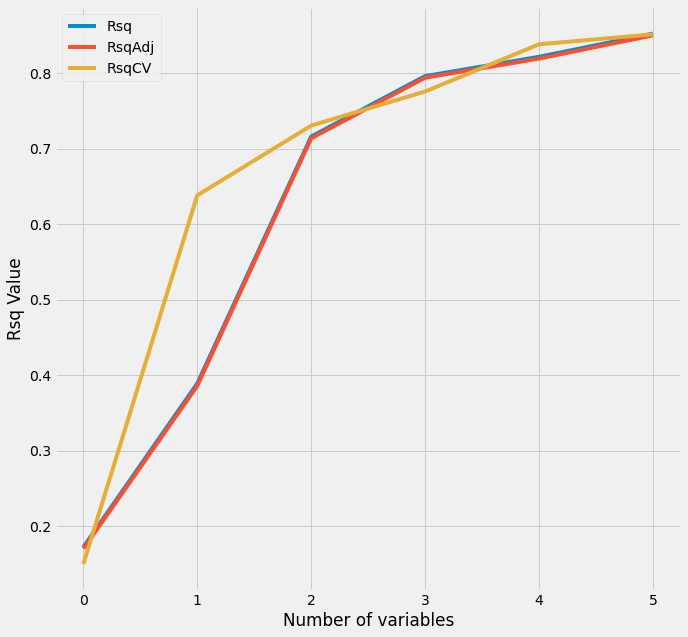

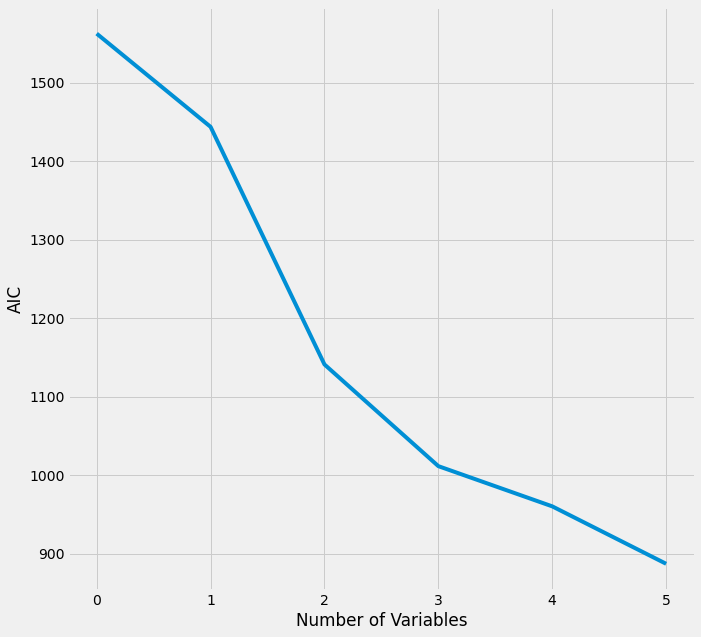

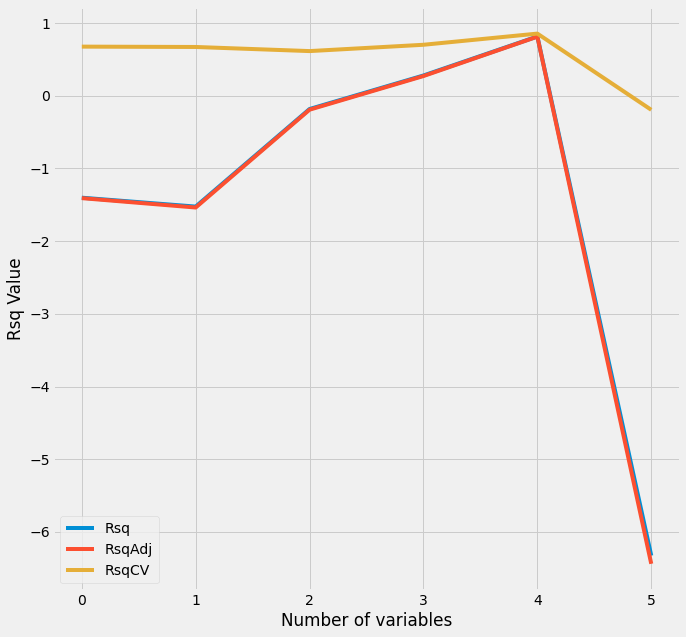

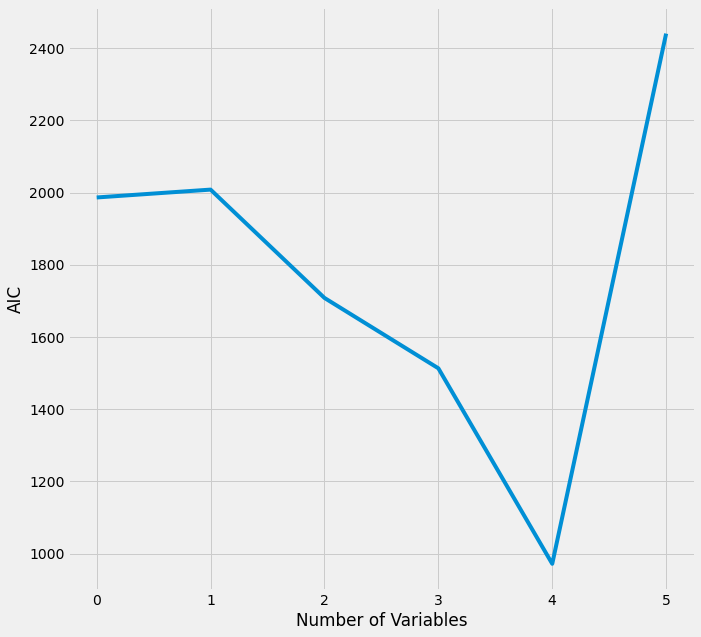

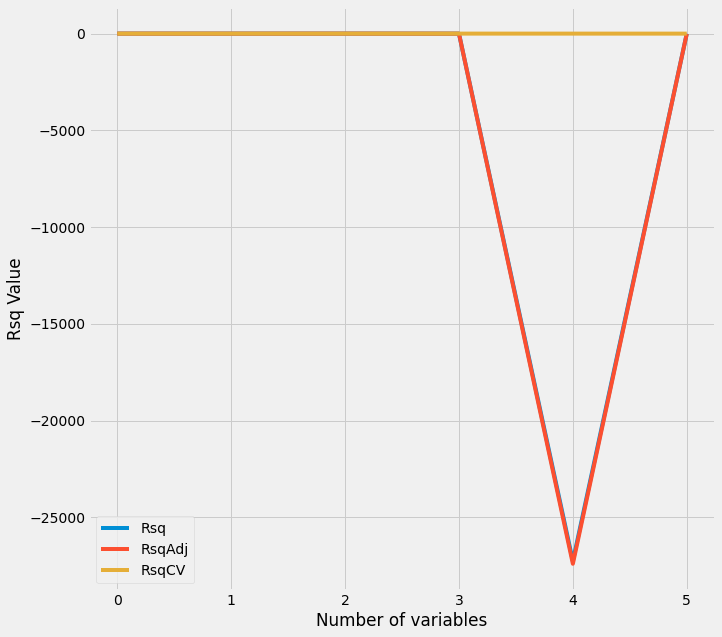

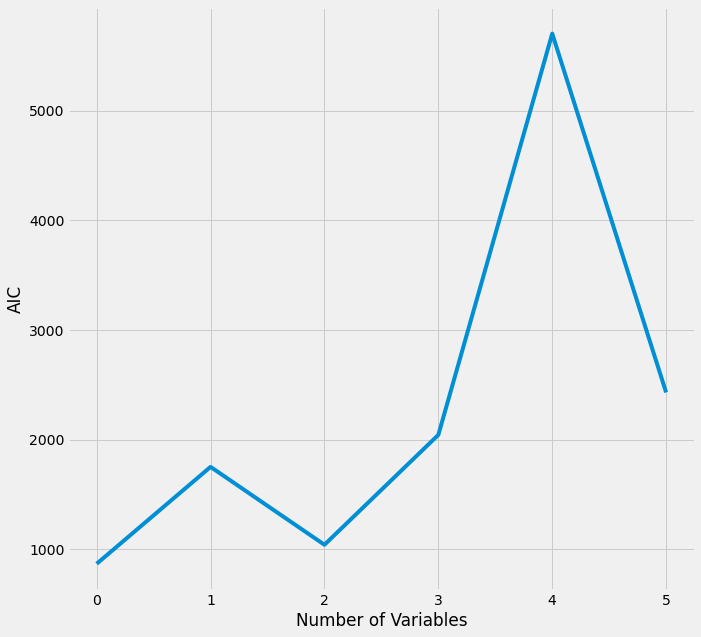

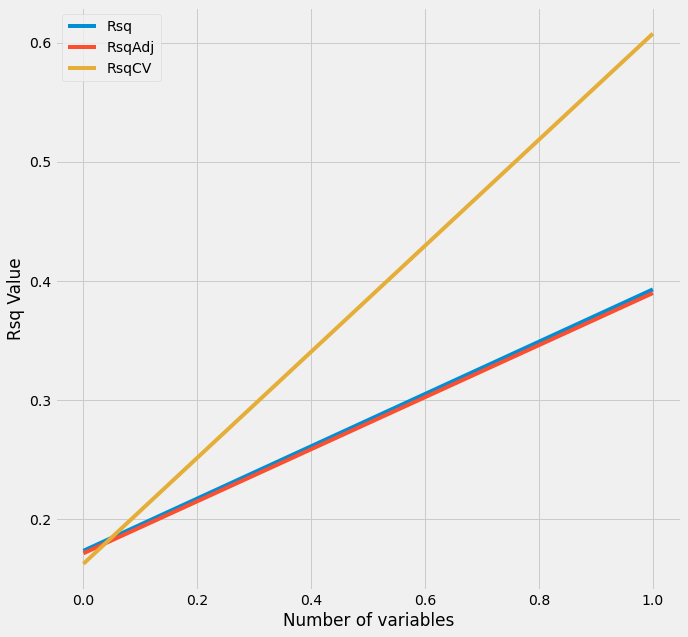

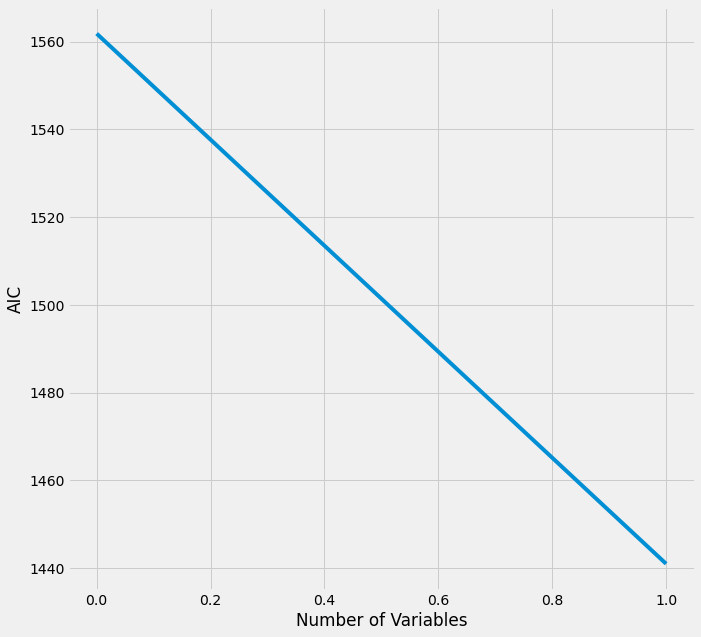

In [26]:
def plot_and_save(arrays, name, basepath = "../plots/python/"): 
    rsq, rsq_a, rsq_cv, aic = arrays
    x = [_ for _ in range(len(rsq))]
    plt.style.use("fivethirtyeight")
    plt.rcParams["figure.figsize"] = [10,10]
    plt.plot(x, np.array([rsq, rsq_a, rsq_cv]).transpose())
    plt.xlabel("Number of variables")
    plt.ylabel("Rsq Value")
    plt.legend(["Rsq", "RsqAdj", "RsqCV"])
    plt.savefig(basepath+name)
    plt.show()
    
    plt.style.use("fivethirtyeight")
    plt.plot(x, aic)
    plt.xlabel("Number of Variables")
    plt.ylabel("AIC")
    plt.savefig(basepath+"AIC"+name)
    plt.show()
    
plot_and_save(forward_pcp, "AutoForwardPCP.png")
plot_and_save(backward_pcp, "BackWardPCP.png")
plot_and_save(step_pcp, "StepwisePCP.png")

plot_and_save(forward_3L, "AutoForward3L.png")
plot_and_save(backward_3L, "BackWard3L.png")
plot_and_save(step_3L, "Stepwise3L.png")

plot_and_save(forward_4L, "AutoForward4L.png")
plot_and_save(backward_4L, "BackWard4L.png")
plot_and_save(step_4L, "Stepwise4L.png")
